In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
Sig_Eqs = pd.read_csv("earthquakes-2021-10-13_19-17-17_+0800.tsv", delimiter = '\t')
Sig_Eqs

,Search Parameters,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Country,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,-2150.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,JORDAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,SYRIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TURKMENISTAN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,NaN,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,GREECE,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,NaN,2021.0,9.0,8.0,1.0,47.0,47.0,5806.0,NaN,MEXICO,...,NaN,NaN,NaN,1.0,NaN,3.0,NaN,NaN,7317.0,4.0
6266,NaN,2021.0,9.0,15.0,20.0,33.0,32.0,NaN,NaN,CHINA,...,NaN,NaN,88.0,2.0,NaN,3.0,809.0,3.0,7290.0,4.0
6267,NaN,2021.0,9.0,21.0,23.0,15.0,53.0,NaN,NaN,AUSTRALIA,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,46.0,1.0
6268,NaN,2021.0,9.0,27.0,6.0,17.0,22.0,NaN,NaN,GREECE,...,NaN,NaN,20.0,1.0,NaN,3.0,772.0,3.0,NaN,NaN


In [3]:
# 国家是按照首字母分组的
deaths = Sig_Eqs[['Country','Deaths']].groupby(['Country'],as_index=True).agg({'Deaths':sum})
deaths.sort_values(['Deaths'],ascending=False,inplace=True)
deaths[:10]

,Deaths
Country,
CHINA,2074900.0
TURKEY,1074769.0
IRAN,1011437.0
SYRIA,439224.0
ITALY,434863.0
HAITI,323472.0
AZERBAIJAN,317219.0
JAPAN,278138.0
ARMENIA,191890.0


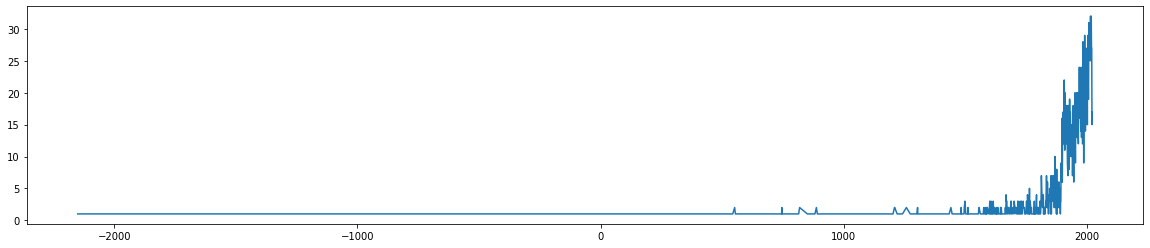

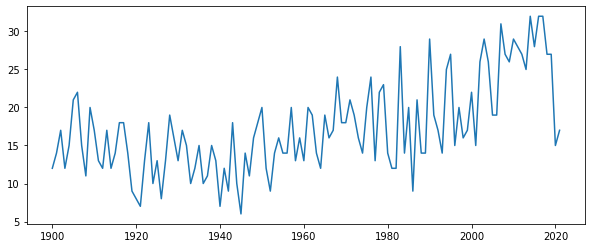

In [4]:
num_eqs = Sig_Eqs[Sig_Eqs["Mag"] > 6].groupby('Year')['Mag'].count()
num_eqs
fig=plt.figure(num=1,figsize=(20,4))
plt.plot(num_eqs)
plt.show()
fig=plt.figure(num=1,figsize=(10,4))
plt.plot(num_eqs[1900:])
plt.show()

In [5]:
temp = Sig_Eqs.loc[Sig_Eqs['Country'] == 'CHINA']
count = temp["Country"].count()
max_Mag = temp['Mag'].max()
data = temp.loc[temp['Mag'] == max_Mag]
type(data['Hr'].astype(str).item())
if data['Hr'].astype(str).item() == "nan":
    print("e")

e


In [40]:
import numpy as np

def CountEq_LargestEq(country):
    temp = Sig_Eqs.loc[Sig_Eqs['Country'] == country]
    count = temp["Country"].count()
    max_Mag = temp['Mag'].max()
    data = temp.loc[temp['Mag'] == max_Mag]
    date = data['Year'].fillna(0).astype(int).astype(str) + "/" + data['Mo'].fillna(0).astype(int).astype(str) + "/" + data['Dy'].fillna(0).astype(int).astype(str)
    return count, list(date)

count, date = CountEq_LargestEq("AZERBAIJAN")
countries = Sig_Eqs['Country'].unique()[1:]
countries = list(countries)
res = []
for country in countries:
    new = []
    count, date = CountEq_LargestEq(country)
    new.append(country)
    new.append(count)
    new.append(date)
    res.append(new)
df = pd.DataFrame(res, columns=["country", "total", "date"])
df.sort_values("total", ascending=False).set_index('country')

,total,date
country,,
CHINA,610,[1668/7/25]
JAPAN,409,[2011/3/11]
INDONESIA,399,[2004/12/26]
IRAN,380,[856/12/22]
TURKEY,330,"[1912/8/9, 1916/1/24]"
...,...,...
NORWAY,1,[1819/8/31]
CENTRAL AFRICAN REPUBLIC,1,[1921/9/16]
PALAU,1,[1914/10/23]
